# Output File Analysis - Multiple SRRs - Donor to Recipient Workflows

## Variables

For convenience, there might be more than one set of samples in the cells below. If so, note that the order matters, and only the last cell will be relevant, as the previous ones will be overwritten

In [2]:
## Variables
srr_names <- c("SRR5090623", "SRR5090625", "SRR5090627", "SRR5090629", 
               "SRR5090631", "SRR5090633", "SRR5090635", "SRR5090637", 
               "SRR5090639", "SRR5090641")
donor_name <- "hpv18"
recipient_name <- "UCSChg38"
inputs_folder <- "../../wallaby/workflows/final-outputs-hpv18-rnaseq"
donor_ref_genome <- "../../wallaby/data/ref_genomes/hpv/HPV18.fa"
recipient_ref_genome <- "../../wallaby/data/ref_genomes/human/hg38.fa"

In [155]:
## Variables
srr_names <- c("SRR5090597", "SRR5090599", "SRR5090601", "SRR5090603", 
               "SRR5090605", "SRR5090607", "SRR5090609", "SRR5090611", 
               "SRR5090613", "SRR5090615", "SRR5090617", "SRR5090619")
donor_name <- "hpv16"
recipient_name <- "UCSChg38"
inputs_folder <- "../../wallaby/workflows/final-outputs-hpv16-rnaseq"
donor_ref_genome <- "../../wallaby/data/ref_genomes/hpv/HPV16.fa"
recipient_ref_genome <- "../../wallaby/data/ref_genomes/human/hg38.fa"

## Setup Environment

In [4]:
# Select crossings to import and order of visualization
crossings <- c("UMd_MMr", "MUd_MMr", "UMd_MUr", "MUd_UMr", "MMd_UMr", "MMd_MUr")

In [78]:
# Source external functions
source("srrs_util.R")

In [6]:
# Load libraries and setup multithreading
setup_enviroment()

In [156]:
# Load all .bed files for all srrs created by the cromwell workflow
donor_granges_all_srrs <- load_beds(srr_names, crossings, donor_name)
recip_granges_all_srrs <- load_beds(srr_names, crossings, recipient_name)

In [157]:
# Load recipient .bam files created by the cromwell workflow
recip_bams_all_srrs <- load_bams(srr_names, crossings, recipient_name)

In [83]:
# Create a sqlite database from TxDb and corresponding Org packages
# The database provides a convenient way to map between gene, transcript, and protein identifiers.
src <- suppressMessages(suppressWarnings(src_organism("TxDb.Hsapiens.UCSC.hg38.knownGene")))
# Create a full genome sequences for Homo sapiens as provided by UCSC (hg38, based on GRCh38.p12)
Hsapiens <- BSgenome.Hsapiens.UCSC.hg38

## Donor Analysis

In [158]:
# Aggregated view of all overlapping crossings for the potential donor for all srrs
srrs_summary_table <- srrs_summary_table_donor (granges_list = donor_granges_all_srrs, 
                                                min_num_crossings = 2,
                                                min_num_reads = 20)

srr,id,chr,start,stop,num_crossings,unique_crossings,num_reads
SRR5090597,1,NC_001526.4,7143,7371,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",177
SRR5090597,2,NC_001526.4,7377,7906,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",650
SRR5090599,1,NC_001526.4,7148,7271,5,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_MUr",20
SRR5090599,2,NC_001526.4,7449,7906,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",94
SRR5090601,1,NC_001526.4,7839,7906,2,"UMd_MMr, MUd_MMr",73
SRR5090603,1,NC_001526.4,7148,7272,5,"UMd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",22
SRR5090603,2,NC_001526.4,7449,7906,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",463
SRR5090605,1,NC_001526.4,2563,2885,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",26
SRR5090605,2,NC_001526.4,7505,7906,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",228
SRR5090607,<NA>,<NA>,0,0,0,<NA>,0


## Recipient Analysis

In [159]:
# Aggregated view of all overlapping crossings for the potential recipient for all srrs
srrs_summary_table <- srrs_summary_table_recipient (granges_list = recip_granges_all_srrs, 
                                                    min_num_crossings = 2,
                                                    min_num_reads = 20, 
                                                    src = src,
                                                    Hsapiens = Hsapiens)

srr,id,chr,start,stop,num_crossings,unique_crossings,num_reads,gene_name,sequence
SRR5090597,1,chr1,150576896,150577494,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",386,MCL1,GCTTCCCTTGTACAGTACTGAGGCTTACAGTCATAGTTCTATTACTTGTAACTTTTACACAGGTCACTGGCATTCTTAGTGCTTCTCTTAACACTACAGTAAATTAATGAATTCGGCGGGTAATCAATTCTATGACTTGCCTGGCTACTGGCCACTTTCCTGTTCTCAACAAGGAAATTAAGTCTTTCCACCCTACCATCTTCACTAAATCTAAAAGTCCTCCTCCATAGCTTCCCAAACAAAGTTTGTTTGTTGCTGAAACTGAACTTTGCTTCTTTCAGACAGTGACTCTTCAATCAATGGGGAGCACTCTTCCCATGTATTTATTCTTGTTAGCCATAATCCTCTTGCCACTTGCTTTTCTGGCTAGGTTGCTAGGGTGCAACTCTAGGAAGTTACAGCTTGGAGTCCAACTGCATAAACTGGTTTTGGTGGTGGTGGTGGTTGGTTAAAAGTCAACTATTGCACTTACAGTAAGGCTATCTTATTAGATATGCCAAACCAGCTCCTACTCCAGCAACACCTGCAAAAGCCAGCAGCACATTCCTGATGCCACCTTCTAGGTCCTCTACATGGAAGAACTCCACAAACCCATCCTA
SRR5090597,2,chr1,150578243,150578495,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",528,MCL1,CCCAGCCTCTTTGTTTAACTAGCCAGTCCCGTTTTGTCCTTACGAGAACGTCTGTGATACTTTCTGCTAATGGTTCGATGCAGCTTTCTTGGTTTATGGTCTTCAAGTGTTTAGCCACAAAGGCACCAAAAGAAATGAGAGTCACAATCCTGCCCCAGTTTGTTACGCCGTCGCTGAAAACATGGATCATCACTCGAGACAACGATTTCACATCGTCTTCGTTTTTGATGTCCAGTTTCCGAAGCATGCCTGA
SRR5090599,1,chr1,206939232,206939466,4,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr",22,PIGR,GTGCCGTTCTCCGGGAAGTTGGTGAGGTTAGCCCTGCCTGCATATTTGCTGGAGACGTAGCCCTCCGAGGAGATGAGGGTTATGCAGCCACCTCTAGCTCCCTGCCGGCACCAGTACTTCCGGGTGTGCCGGTTGACAGAGGTGGGTGGGTAGTAGCACGTGATGGACACTGAGTTACCTTCCACACTATTCACCTCCTCGGGACCAAATATGGGACTCTTCGTGGAGATGGCTG
SRR5090599,2,chr1,206940489,206940589,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",36,PIGR,CTGGGAAGACCGCCAGCAGGCAGGTGAGCACGAAGAGCAGCATTGCTGGTGGGTCCCGAGCGCCGCACCACTCAGGCCGACTTCTCCTGTGCAATGCTGAA
SRR5090599,3,chr1,206949933,206950244,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",54,,GGCCACCCTCCAGGCTCTAGACGATAATCCGTTGCTTGCCTCTTCTAGCTTCTGGTTGCTGCTGACATTCTTTGGTGTTCTTTGGCACGTAGCTGTGTCACTCCAACCTCTGCCTTCATAGTCACATTGGCTTCTGTGTATGTCTCAAATAACTCTCTGTTTCTCTGTTATATGGATGGTATTTAGGGCCCACCCAGCTAATCCAAGATGATGTCCTCATCTCAAGATCCTGAACTTCATCACATCTACAAAGACTCTTTTCCAAATAAGGTCACACTTCTGGGCTCCAGAGATTGAGACATAGACAAACCT
SRR5090601,1,chr4,138685416,138685761,2,"UMd_MMr, MUd_MMr",122,,AGATTAACTGTATCTTGAGAGTTGGCCAGGAGTAAGAAGAGTGTTTGGAAGGAAGAGAAGGTGGAAAATGAAGAGGCGGCAAGAGACTCAGGCAATCAGACAAACAAATCATCCATCTTCCCGGCTGAGGTCAGGAATATTCGAAAAGCCCTGTGTCCTGCACAGCAGCCCCACGCAGGTTTAGTGCAGCAGATGCTCTCTGGCTGAGTTAGAGAAACAGACAAAACCCTCATTTCTCTCTGAGCACTAAGTACAGAAGATGAGGCTGCGTCAGTCTCATTAGGAATAATAGACAGAAATTGCTTACAATCATCTCTAATGGGTTGCCAGTTTTCTGACAATGGGC
SRR5090603,1,chr20,33707709,33707974,4,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr",29,PXMP4,ATTGGAGGGACGGCTCTTGTTATAGACGAGGAAGTCTGAGATGTCGTGCCATACATTGCTGTCCTCATAGAGGTAGGTCATGGAGGACTGCAGCGAGGGCTGCAGGGTGGATCGGTGATACTCAAAGAGCCACAGCACCAGCCCCCACACCACCGCAGTGAGCAGCGGGAACGGGTCCCACCTGGGTTCAGGGATGTAGCCCTTCTCTACAGCCAGGCGGCTCAGGGCAAACAGGACGCGTGACAACAGGTACATGTTGATCTGCA
SRR5090603,2,chr20,33710553,33710757,3,"UMd_MMr, UMd_MUr, MUd_UMr",51,PXMP4,ACCTGGCTGTTGATGTTATTGTTTTCTCCAAACACCAGGATACCCCCGAGGAAGGCCGCCAGGAATGCGTGTGCTGGGTAGGTCTTGCCTTGTATGTAGGACTGCAGGGCACGGAGACCCTTGTAGGTGAACACAAACCGTGCCAGGTTCCAGGAGTGGATATATGTGGCCTGCAGTATGGCCCACAGCTTCTCCTGGAGGCTGC
SRR5090603,3,chr20,33714672,33714742,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",116,PXMP4,ACCTGCCATTCCGGAAGAGAAAGGTCATGACCAGCGCGTGAGGGGCCCGGATTTTGGCTCCATAGCTGTAG
SRR5090603,4,chr20,33728689,33729163,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",205,,GTCACTTTTGTCTCCACAGAGACAACTTGTCAGGAACAGTGGCTAGCAGGGTTCCCCAAGGGGAGAGGAACTTTGAAAAAACAATTTTAAAAAATTGTAGTTCACAGGTCTCAAACTCCTGGGCTCATGCAGTCCTCCTGCCTTGGCCTCTCAAAGTGCTAGGCTTAGAGCAGTGCGCCACCATGCCCAGCTGCAAACAAATAATTTTTAATTGTAGGAGTTATATAGTGAATACAAGAAAATGAAAATTATGATATTTGTTATTTATTTAGCTGAGGCTAAAATAGGTATTTTAGTAAAACCAATGAGAACATTTAGAGTCCAATCCATGGTTGTCCCGTTGTATGACGATGTGGCCATGATCATGGGAGAGATTCATGATTGATGGTGACAAAGATTCTTTGCTTGCTGTAACTGCTTGGTCAGACTTTGGAATCTTCTGCTAGGCCCACCTGTGCACTTCTTTGTAAAATCT


## Donor and Recipient Graphs

### SRR5090597

#### Donor reads density graph

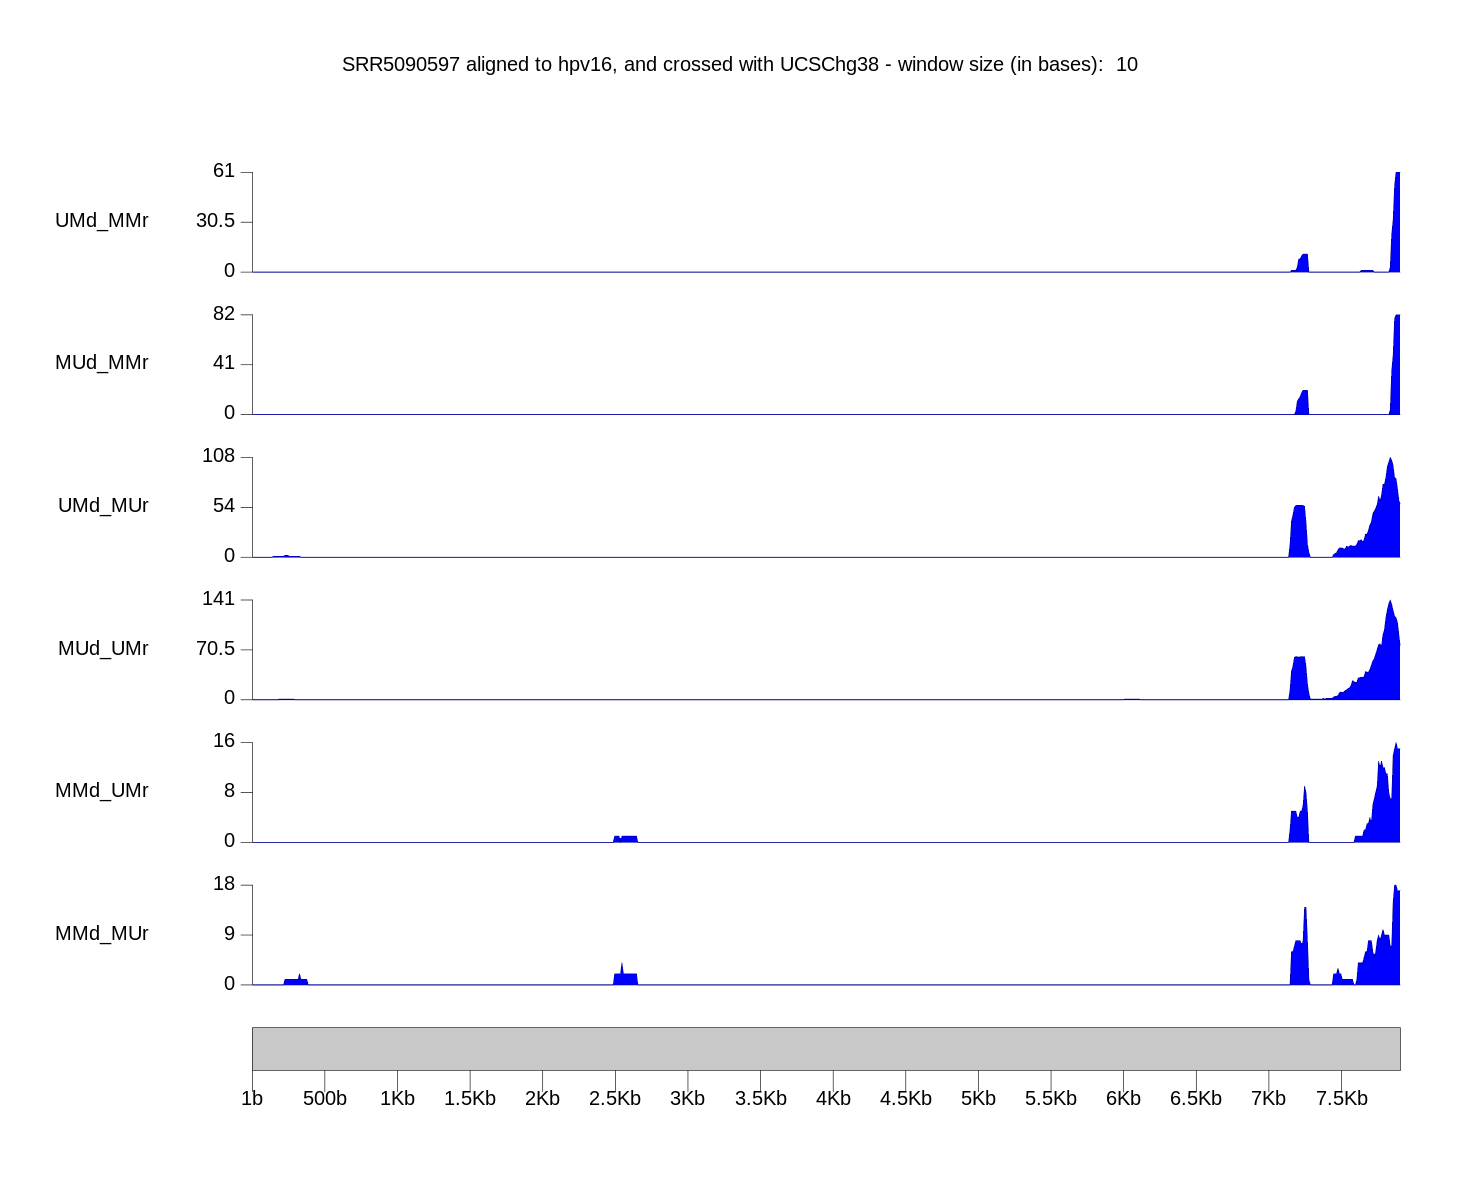

#### Recipient reads density graph

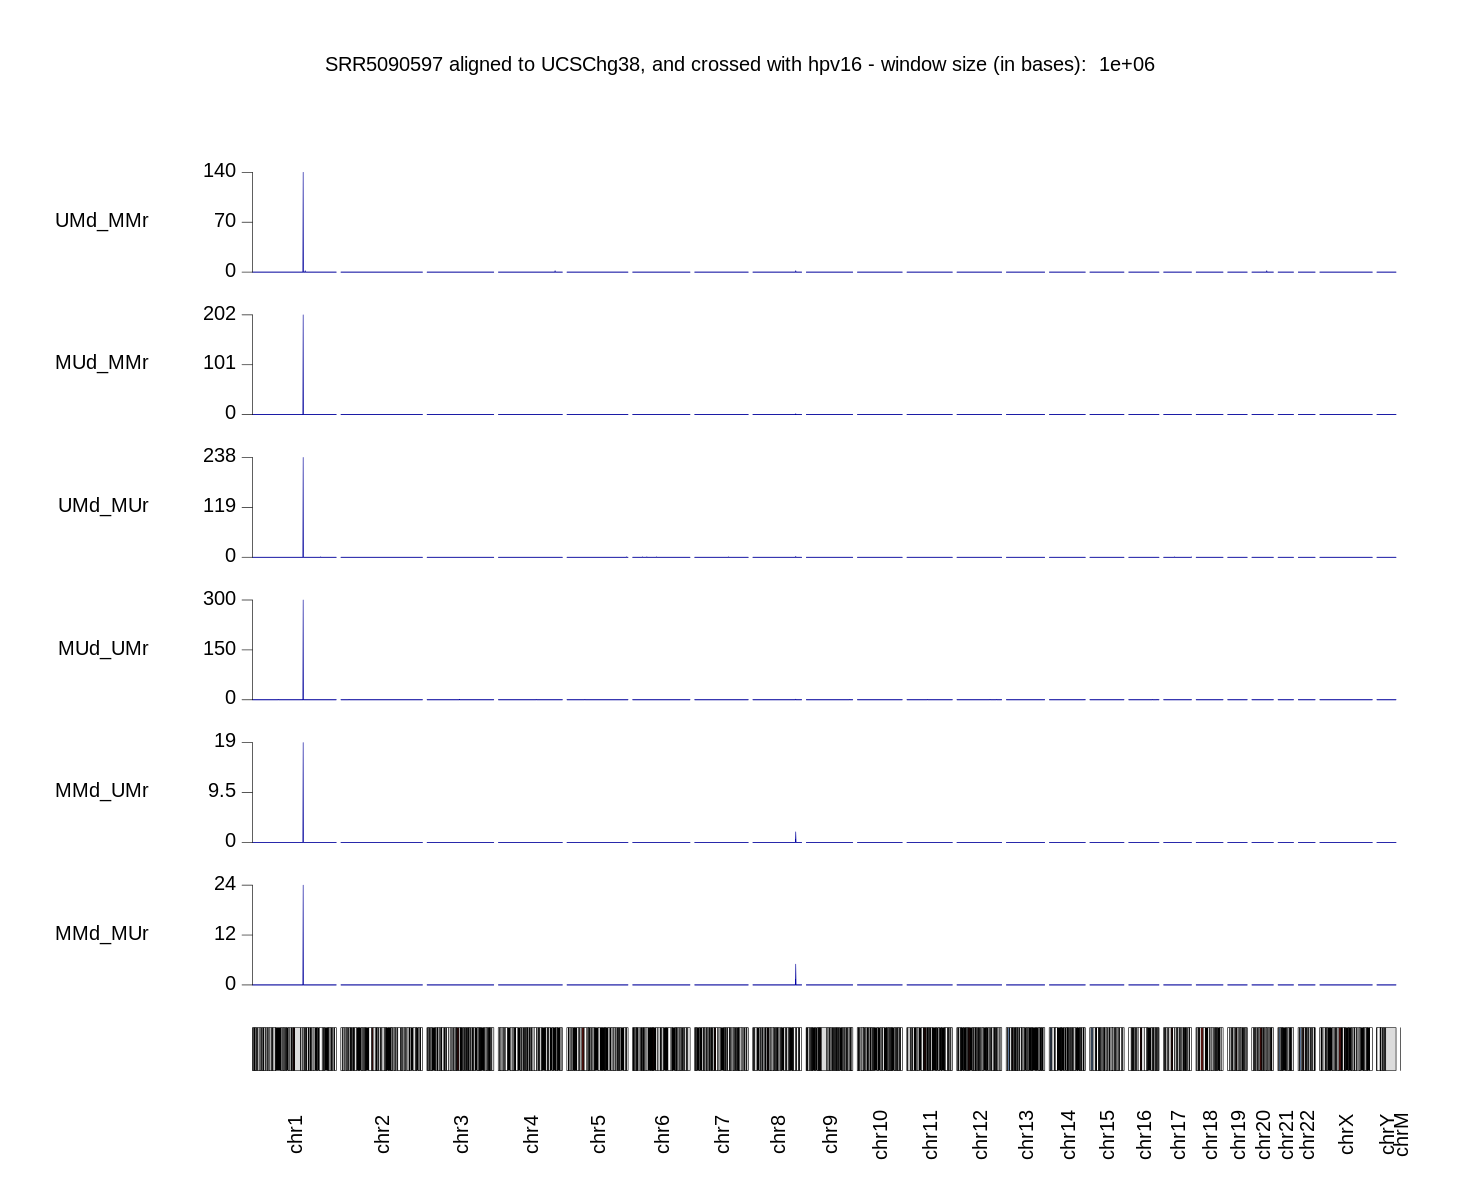

#### Crossings overlap graph - Potential integration

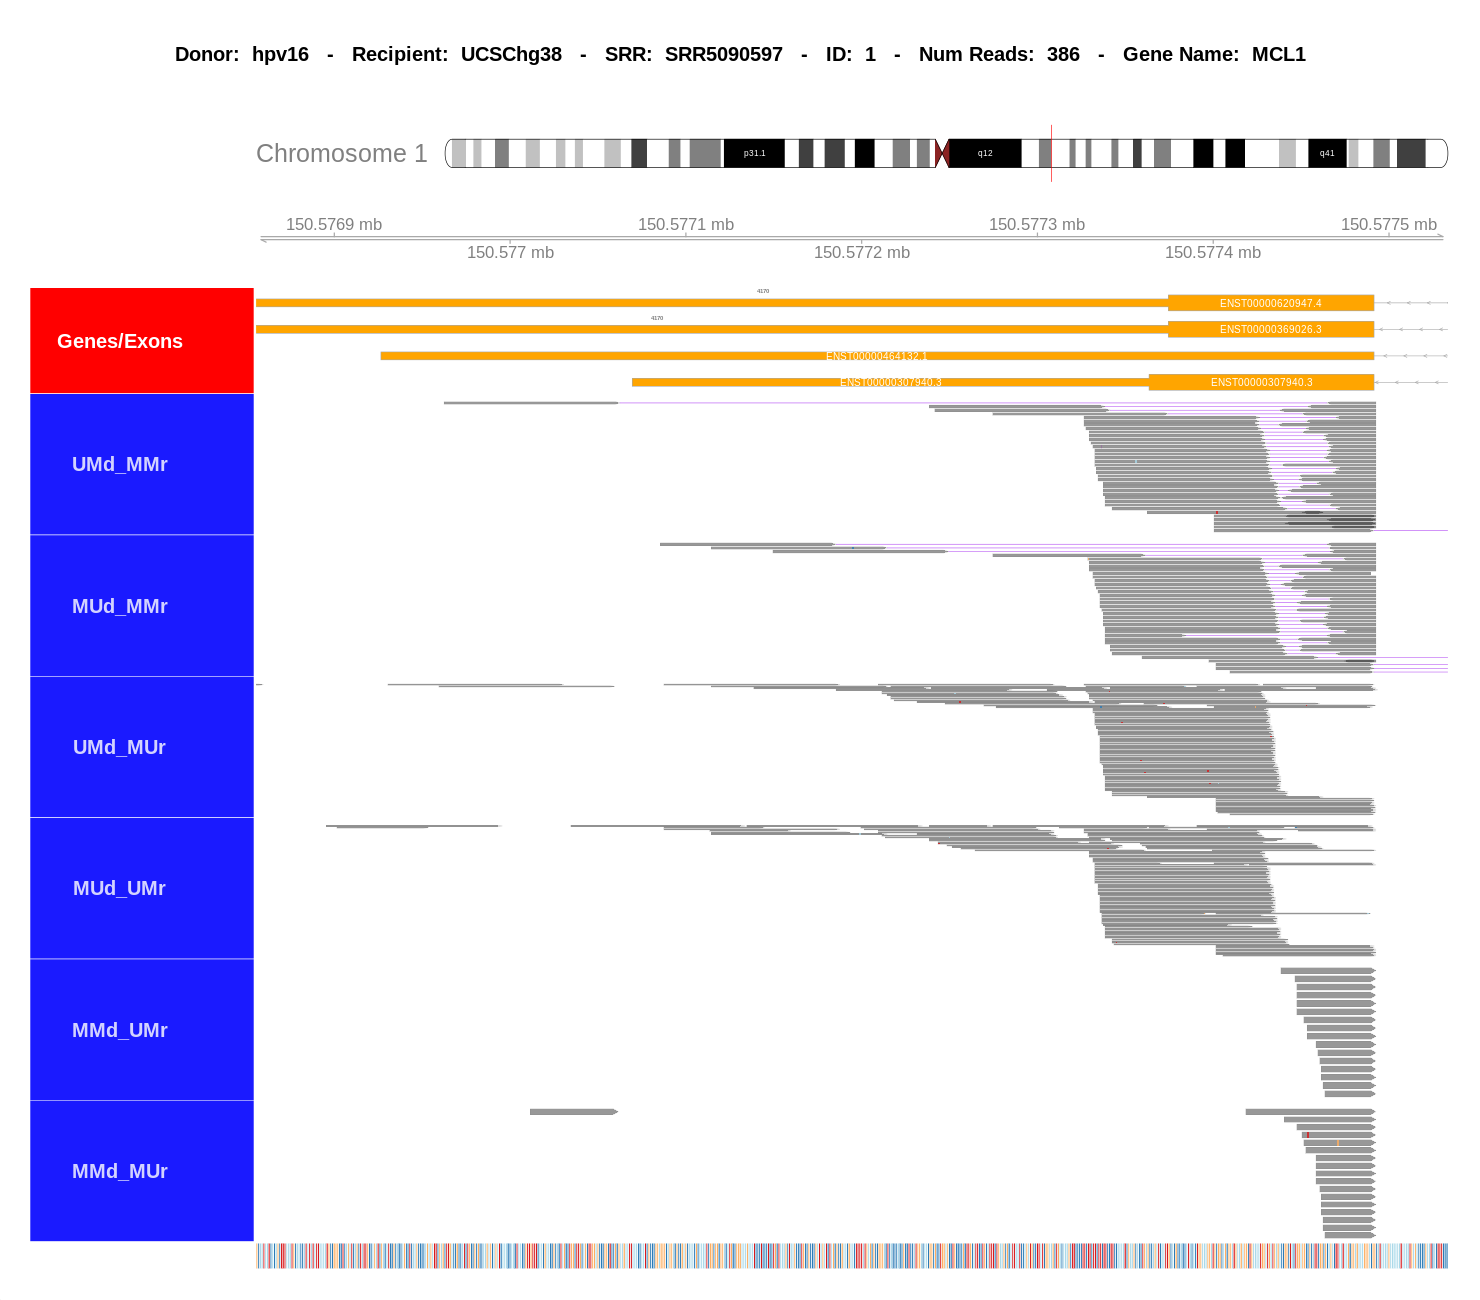

#### Crossings overlap graph - Potential integration

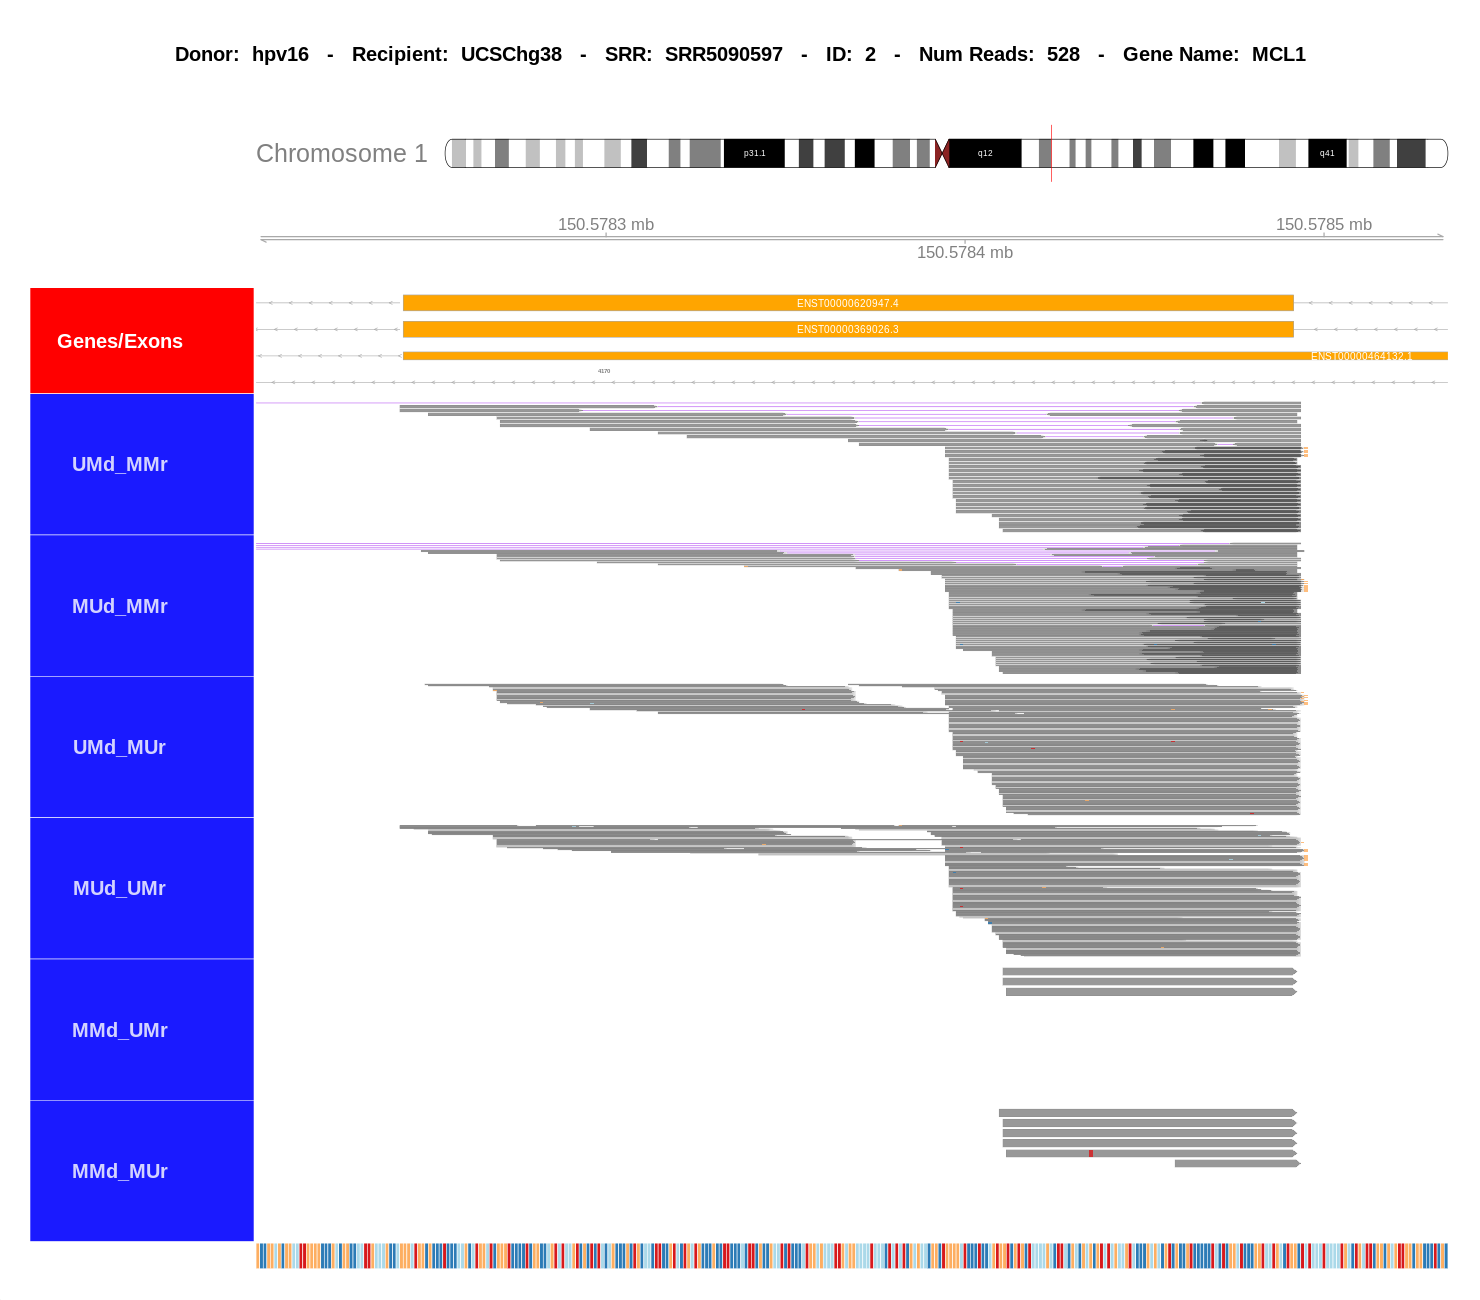

### SRR5090599

#### Donor reads density graph

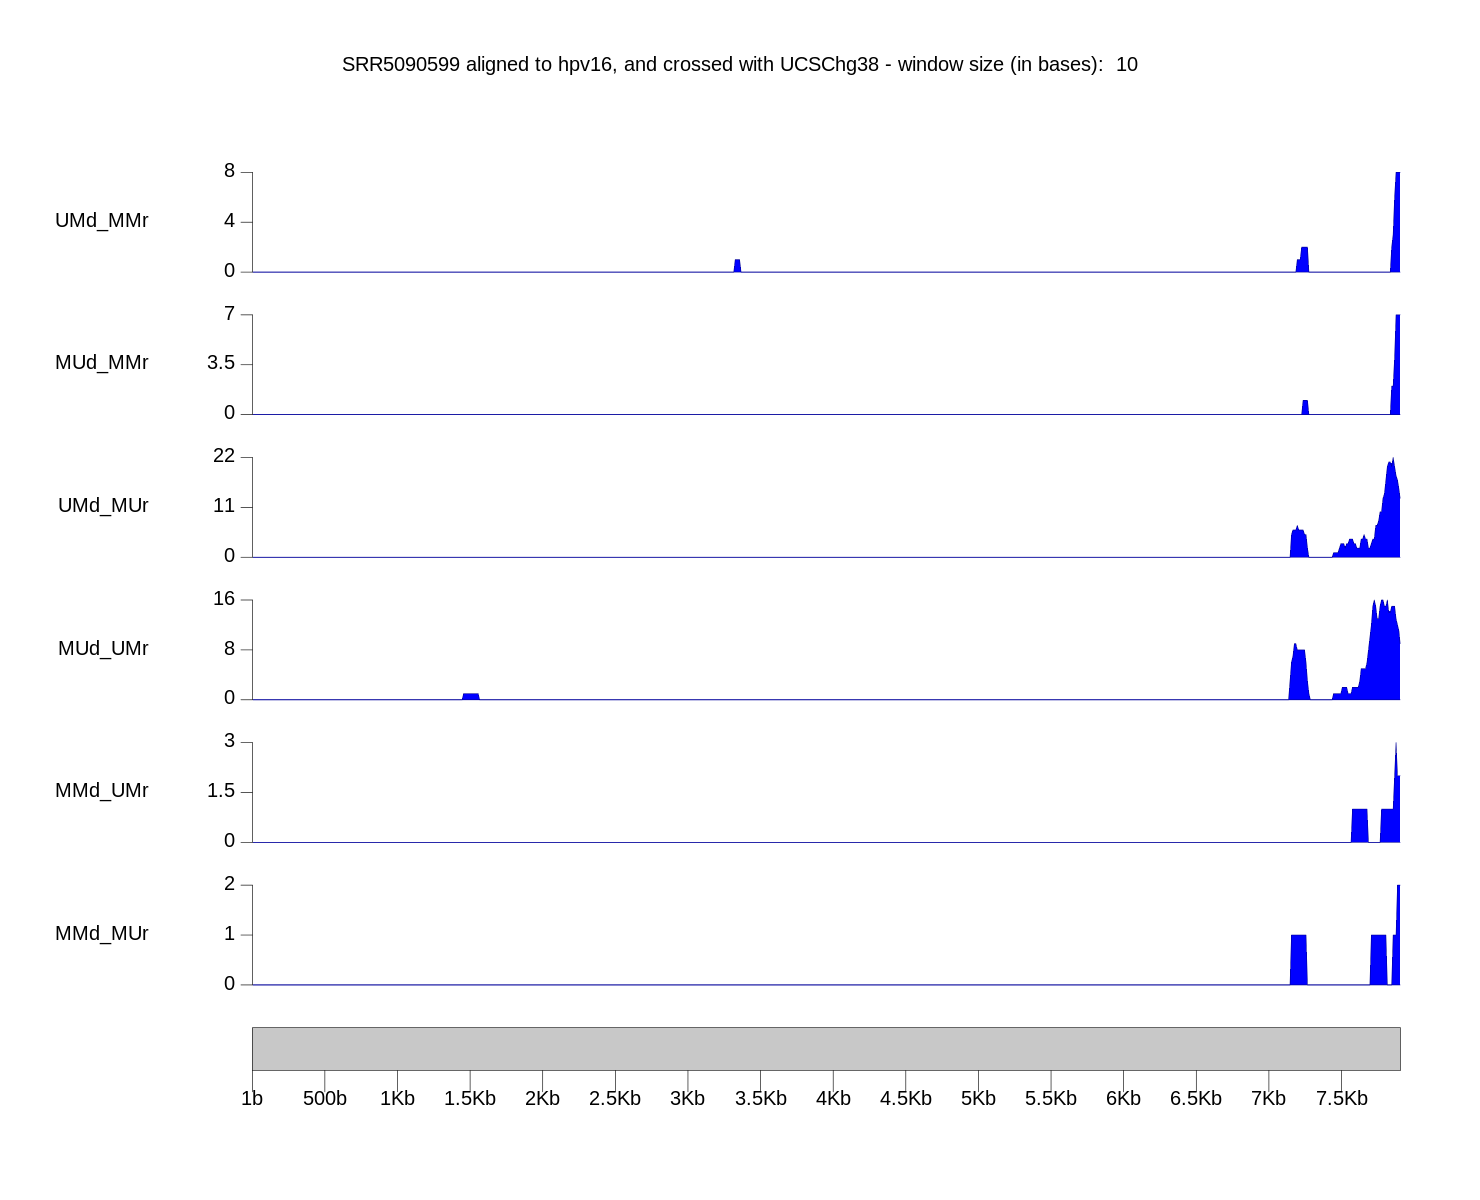

#### Recipient reads density graph

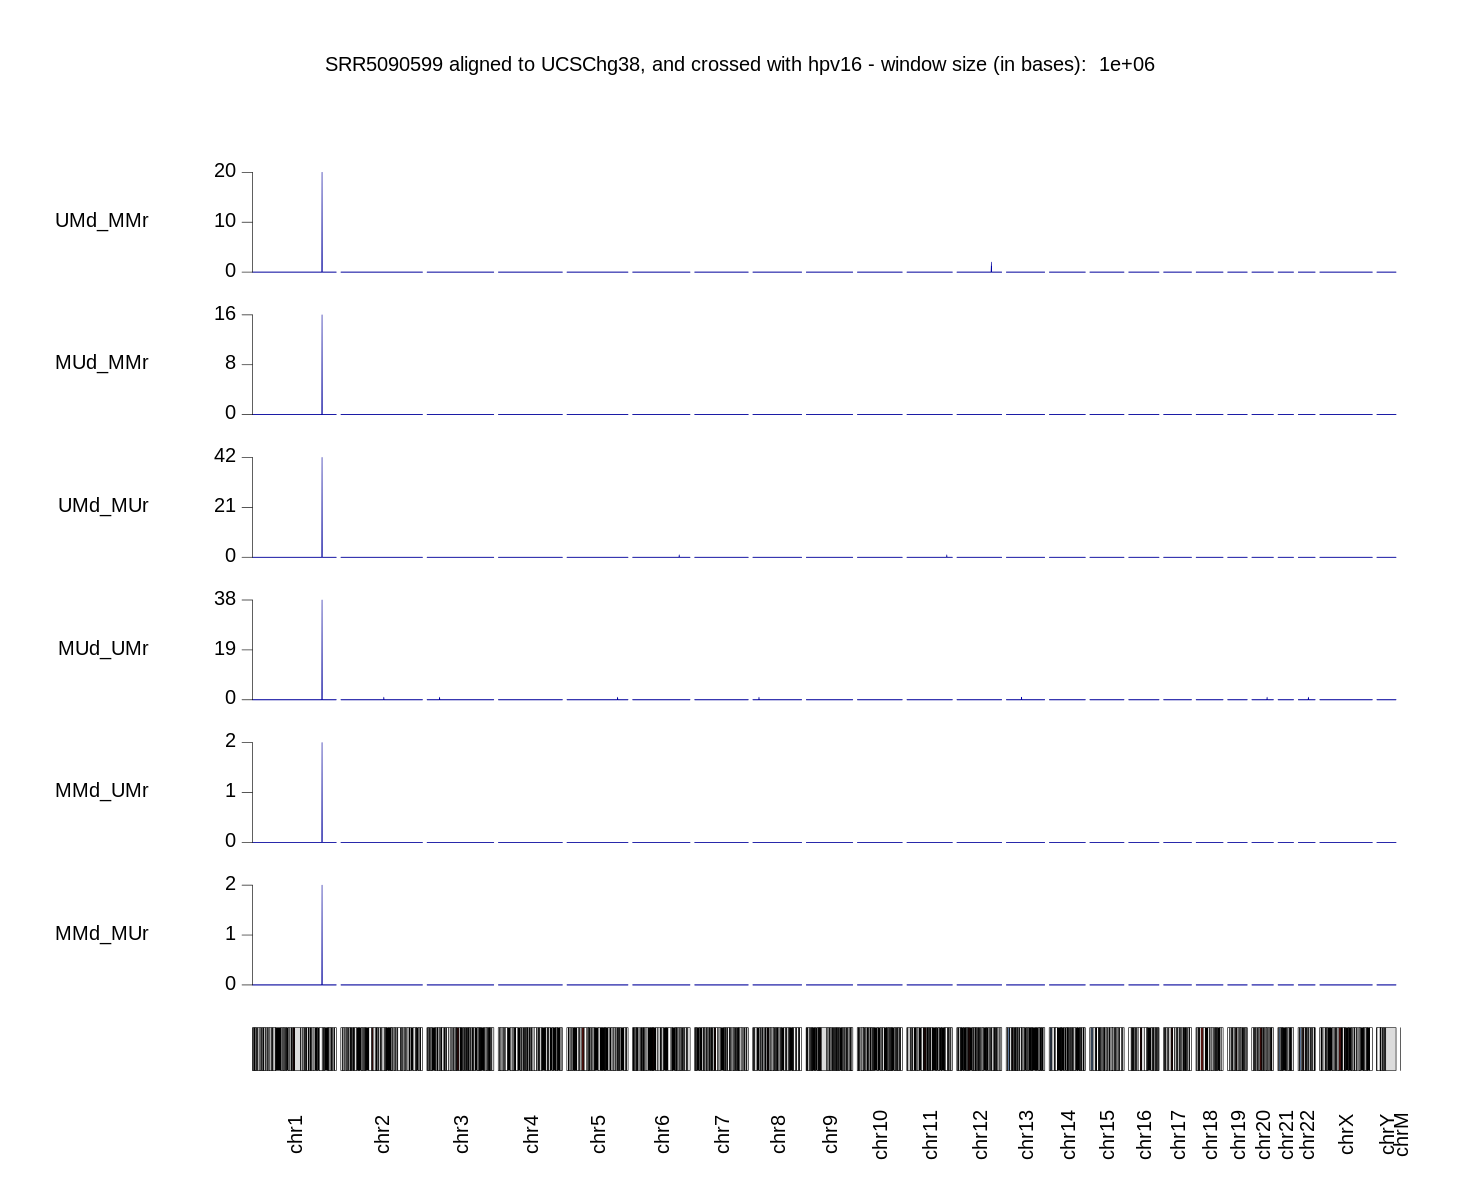

#### Crossings overlap graph - Potential integration

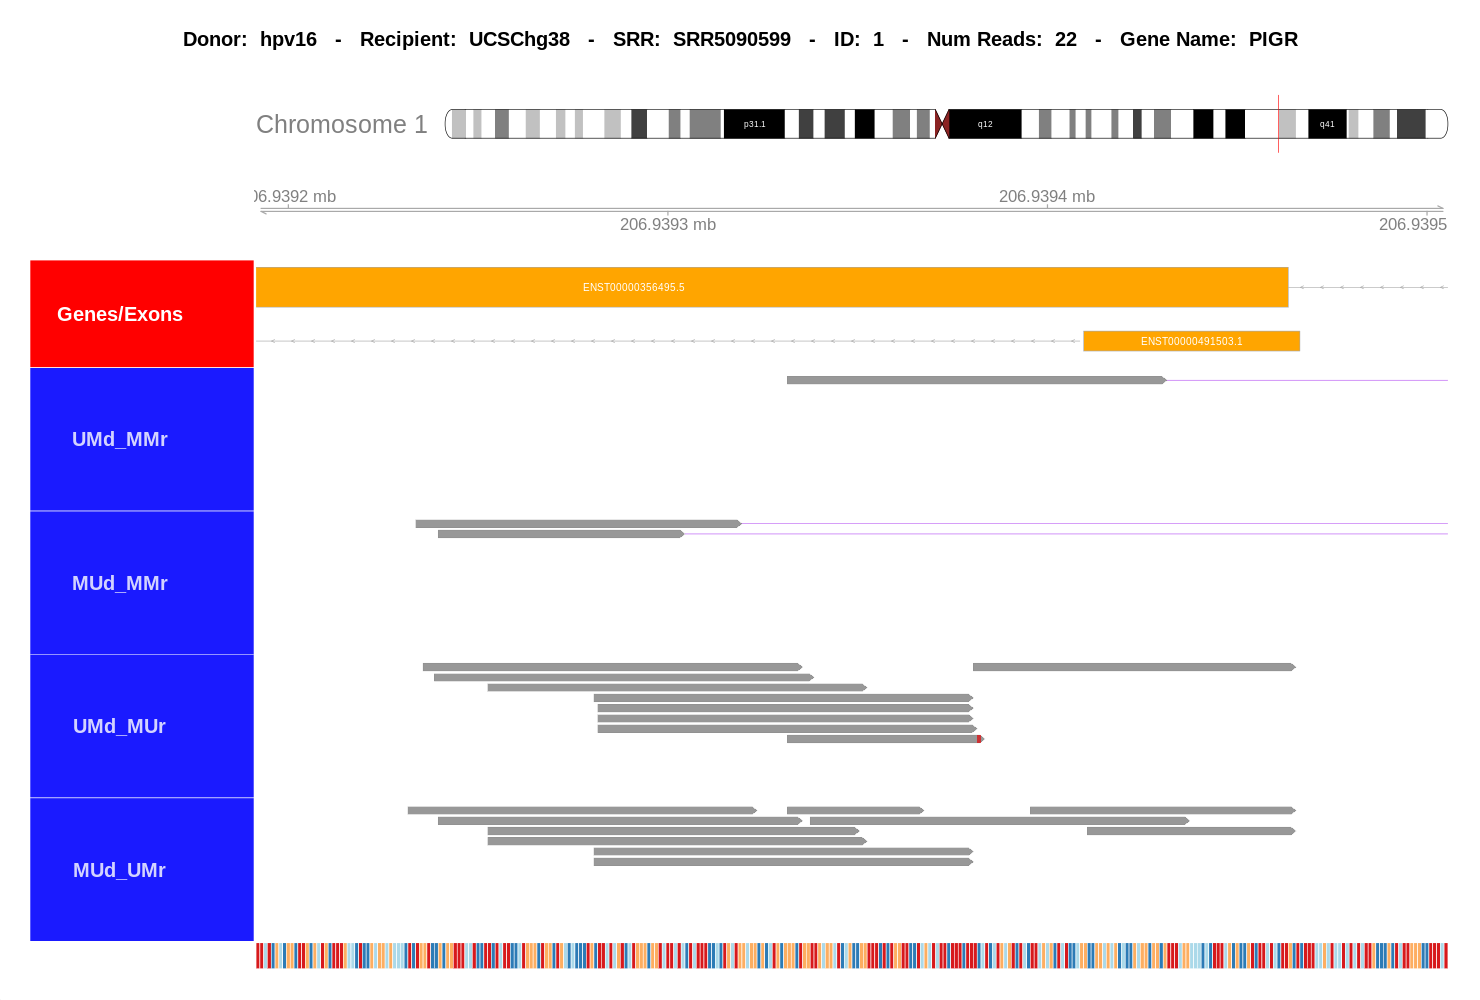

#### Crossings overlap graph - Potential integration

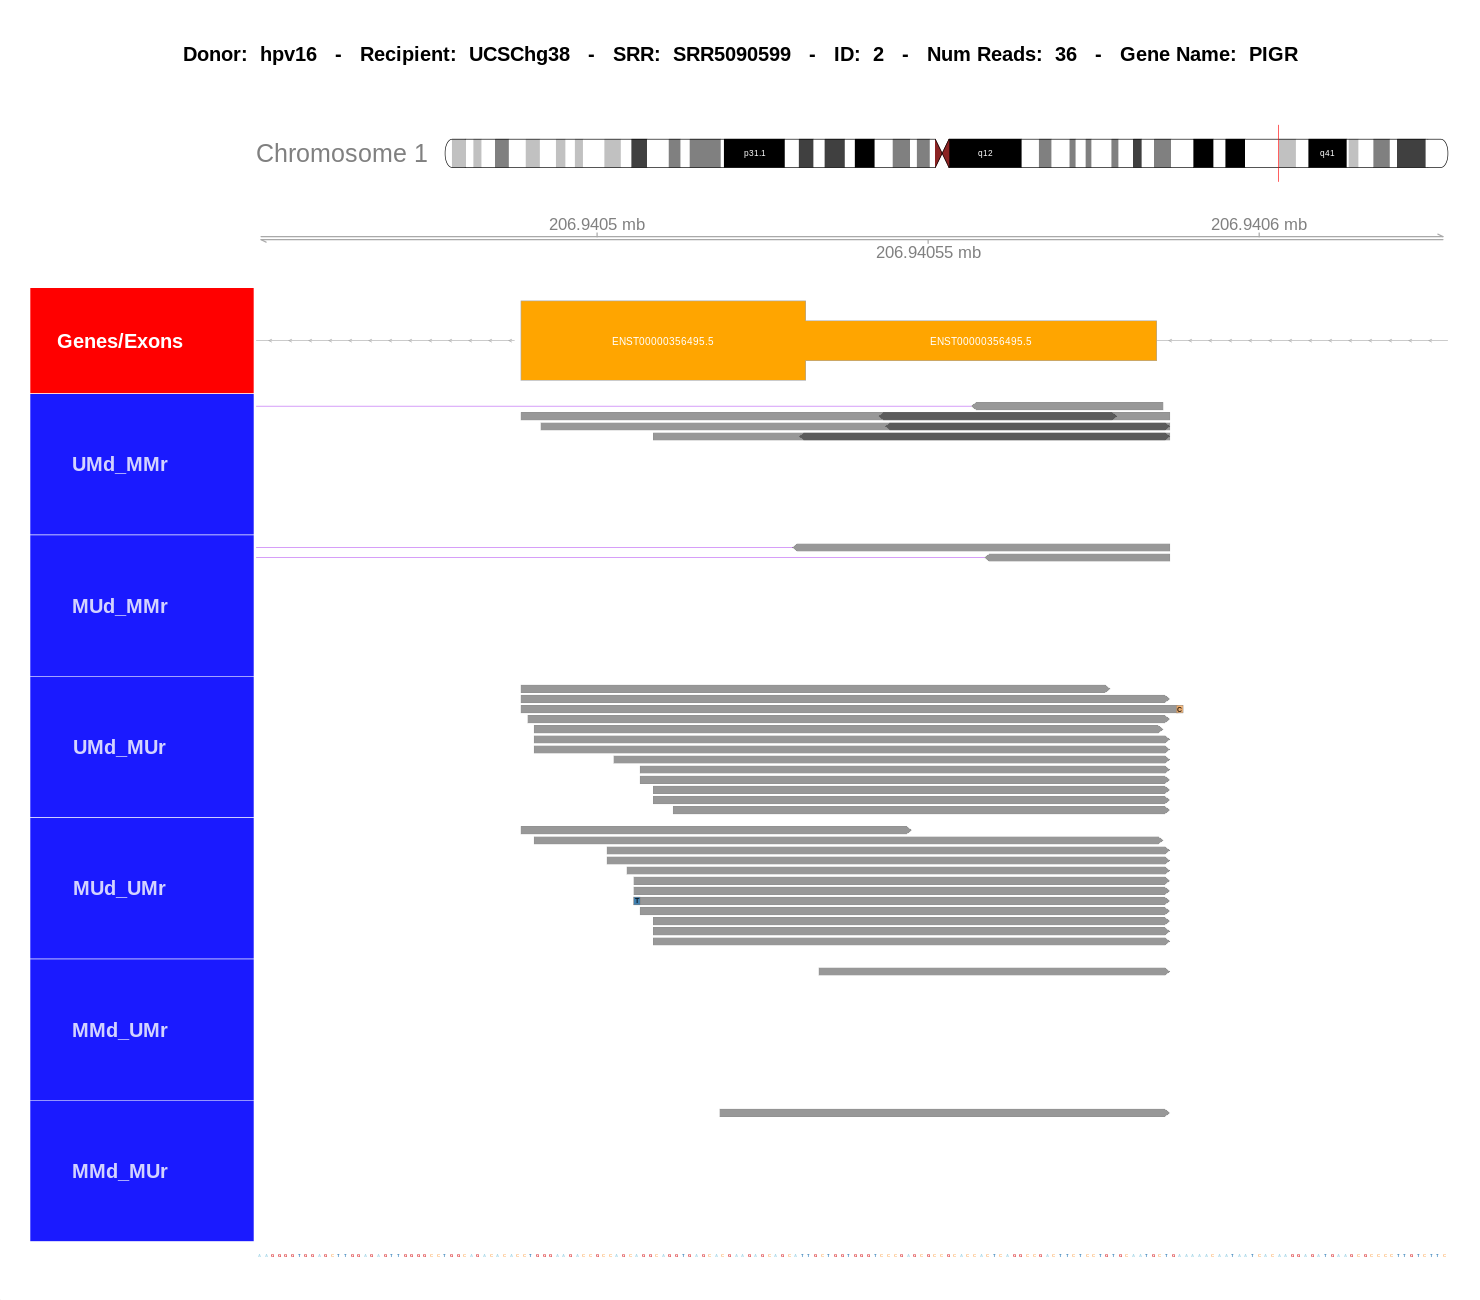

#### Crossings overlap graph - Potential integration

In [ ]:
# Plot all the overlapping reads for all 'ids' for all 'srr's
plot_all_srrs(srr_names, srrs_summary_table, crossings, donor_granges_all_srrs, recip_granges_all_srrs, 
              recip_bams_all_srrs, donor_ref_genome, recipient_ref_genome, donor_name, recipient_name)